In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


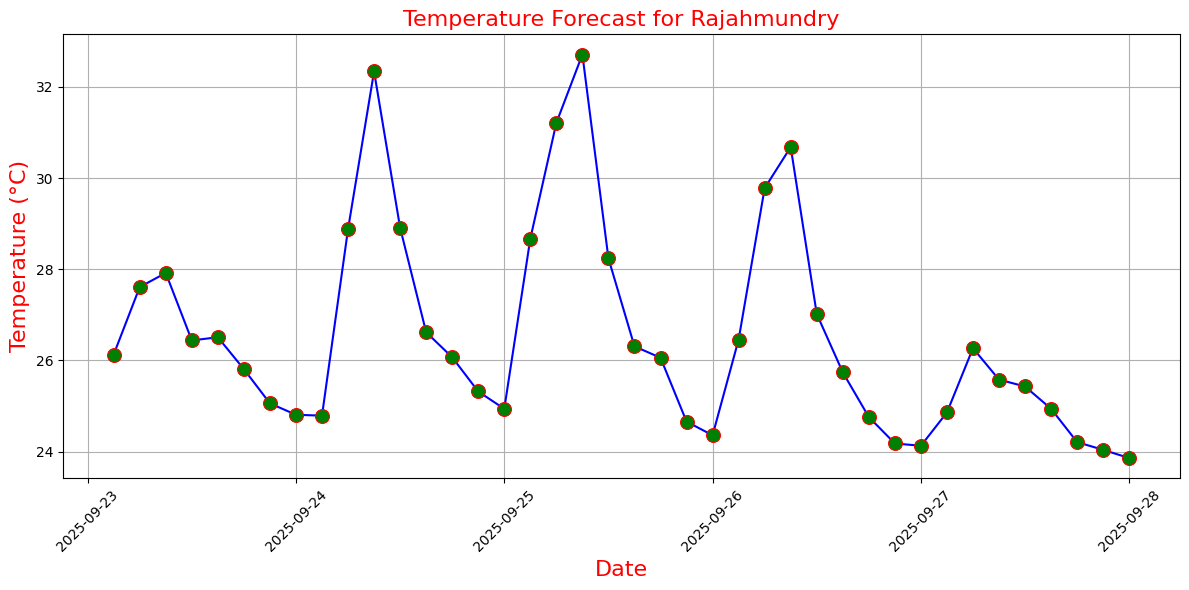

In [4]:
# ========================== IMPORT REQUIRED LIBRARIES ==========================
import requests                  # To fetch weather data from OpenWeatherMap API
import matplotlib.pyplot as plt  # To plot graphs
import seaborn as sns            # For advanced and styled visualizations
import pandas as pd              # To handle tabular data (DataFrame)

# ========================== CONFIGURATION ==========================
API_KEY = "09b9292aedec9b92462c7b39084ce984"   # Your OpenWeatherMap API key
CITY = "Rajahmundry"                           # City name for weather forecast

# API endpoint (5-day / 3-hour forecast) with units set to Celsius
URL = f"https://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

# ========================== FETCH DATA FROM API ==========================
response = requests.get(URL)   # Send GET request to API
data = response.json()         # Convert API response into JSON format

# ========================== PARSE REQUIRED DATA ==========================
forecast_list = data["list"]   # Extract list of forecast entries (3-hour intervals)

# Extract date-time and temperature values
dates = [entry["dt_txt"] for entry in forecast_list]               # Date & time
temps = [entry["main"]["temp"] for entry in forecast_list]         # Temperature (°C)

# Create a DataFrame for better data handling and visualization
df = pd.DataFrame({
    "DateTime": pd.to_datetime(dates),     # Convert string dates to datetime objects
    "Temperature (°C)": temps
})

# ========================== DATA VISUALIZATION ==========================
plt.figure(figsize=(12, 6))   # Set figure size for better visibility

# Line plot of temperature forecast
sns.lineplot(
    data=df,
    x="DateTime",
    y="Temperature (°C)",
    marker="o",      # Circular marker for data points
    ms=10,           # Marker size
    mec='r',         # Marker edge color = red
    mfc='g',         # Marker fill color = green
    color="blue"     # Line color = blue
)

# ========================== GRAPH CUSTOMIZATION ==========================
plt.title(f"Temperature Forecast for {CITY}", color='r', fontsize=16)   # Title of graph
plt.xlabel("Date", color='r', fontsize=16)                             # X-axis label
plt.ylabel("Temperature (°C)", color='r', fontsize=16)                 # Y-axis label
plt.xticks(rotation=45)                                                # Rotate x-axis labels for readability
plt.grid(True)                                                         # Add gridlines
plt.tight_layout()                                                     # Adjust layout to avoid overlap

# ========================== SHOW THE PLOT ==========================
plt.show()
